1.Importing the dependencies

In [2]:
import numpy as np 
import pandas as pd 
import matplotlib.pyplot as plt 
import seaborn as sns 
from sklearn.preprocessing import LabelEncoder
from imblearn.over_sampling import SMOTE
from sklearn.model_selection import train_test_split, cross_val_score, RandomizedSearchCV
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from xgboost import XGBClassifier
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report
import pickle


2. Data Loading & Understanding

In [13]:
df = pd.read_csv("train.csv")

In [14]:
df.shape

(800, 22)

In [15]:
df.head()

,ID,A1_Score,A2_Score,A3_Score,A4_Score,A5_Score,A6_Score,A7_Score,A8_Score,A9_Score,A10_Score,age,gender,ethnicity,jaundice,austim,contry_of_res,used_app_before,result,age_desc,relation,Class/ASD
0,1,1,0,1,0,1,0,1,0,1,1,38.172746,f,?,no,no,Austria,no,6.351166,18 and more,Self,0
1,2,0,0,0,0,0,0,0,0,0,0,47.750517,m,?,no,no,India,no,2.255185,18 and more,Self,0
2,3,1,1,1,1,1,1,1,1,1,1,7.380373,m,White-European,no,yes,United States,no,14.851484,18 and more,Self,1
3,4,0,0,0,0,0,0,0,0,0,0,23.561927,f,?,no,no,United States,no,2.276617,18 and more,Self,0
4,5,0,0,0,0,0,0,0,0,0,0,43.205790,m,?,no,no,South Africa,no,-4.777286,18 and more,Self,0


In [16]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 800 entries, 0 to 799
Data columns (total 22 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   ID               800 non-null    int64  
 1   A1_Score         800 non-null    int64  
 2   A2_Score         800 non-null    int64  
 3   A3_Score         800 non-null    int64  
 4   A4_Score         800 non-null    int64  
 5   A5_Score         800 non-null    int64  
 6   A6_Score         800 non-null    int64  
 7   A7_Score         800 non-null    int64  
 8   A8_Score         800 non-null    int64  
 9   A9_Score         800 non-null    int64  
 10  A10_Score        800 non-null    int64  
 11  age              800 non-null    float64
 12  gender           800 non-null    object 
 13  ethnicity        800 non-null    object 
 14  jaundice         800 non-null    object 
 15  austim           800 non-null    object 
 16  contry_of_res    800 non-null    object 
 17  used_app_before 

In [17]:
# display all columns
pd.set_option('display.max_columns', None)

In [18]:
# convert age column to integer type
df["age"] = df["age"].astype(int)
df.head(1)

,ID,A1_Score,A2_Score,A3_Score,A4_Score,A5_Score,A6_Score,A7_Score,A8_Score,A9_Score,A10_Score,age,gender,ethnicity,jaundice,austim,contry_of_res,used_app_before,result,age_desc,relation,Class/ASD
0,1,1,0,1,0,1,0,1,0,1,1,38,f,?,no,no,Austria,no,6.351166,18 and more,Self,0


In [20]:
for col in df.columns:
    numerical_features = ["ID","age","result"]
    if col not in numerical_features:
        print(col,df[col].unique())
        print("-"*50) 
    

A1_Score [1 0]
--------------------------------------------------
A2_Score [0 1]
--------------------------------------------------
A3_Score [1 0]
--------------------------------------------------
A4_Score [0 1]
--------------------------------------------------
A5_Score [1 0]
--------------------------------------------------
A6_Score [0 1]
--------------------------------------------------
A7_Score [1 0]
--------------------------------------------------
A8_Score [0 1]
--------------------------------------------------
A9_Score [1 0]
--------------------------------------------------
A10_Score [1 0]
--------------------------------------------------
gender ['f' 'm']
--------------------------------------------------
ethnicity ['?' 'White-European' 'Middle Eastern ' 'Pasifika' 'Black' 'Others'
 'Hispanic' 'Asian' 'Turkish' 'South Asian' 'Latino' 'others']
--------------------------------------------------
jaundice ['no' 'yes']
--------------------------------------------------
austim

In [21]:
# drop ID and age_desc
df = df.drop(columns=["ID","age_desc"])
df.shape

(800, 20)

In [22]:
df.head(2)

,A1_Score,A2_Score,A3_Score,A4_Score,A5_Score,A6_Score,A7_Score,A8_Score,A9_Score,A10_Score,age,gender,ethnicity,jaundice,austim,contry_of_res,used_app_before,result,relation,Class/ASD
0,1,0,1,0,1,0,1,0,1,1,38,f,?,no,no,Austria,no,6.351166,Self,0
1,0,0,0,0,0,0,0,0,0,0,47,m,?,no,no,India,no,2.255185,Self,0


In [24]:
df.columns

Index(['A1_Score', 'A2_Score', 'A3_Score', 'A4_Score', 'A5_Score', 'A6_Score',
       'A7_Score', 'A8_Score', 'A9_Score', 'A10_Score', 'age', 'gender',
       'ethnicity', 'jaundice', 'austim', 'contry_of_res', 'used_app_before',
       'result', 'relation', 'Class/ASD'],
      dtype='object')

In [25]:
df["contry_of_res"].unique()

array(['Austria', 'India', 'United States', 'South Africa', 'Jordan',
       'United Kingdom', 'Brazil', 'New Zealand', 'Canada', 'Kazakhstan',
       'United Arab Emirates', 'Australia', 'Ukraine', 'Iraq', 'France',
       'Malaysia', 'Viet Nam', 'Egypt', 'Netherlands', 'Afghanistan',
       'Oman', 'Italy', 'AmericanSamoa', 'Bahamas', 'Saudi Arabia',
       'Ireland', 'Aruba', 'Sri Lanka', 'Russia', 'Bolivia', 'Azerbaijan',
       'Armenia', 'Serbia', 'Ethiopia', 'Sweden', 'Iceland', 'Hong Kong',
       'Angola', 'China', 'Germany', 'Spain', 'Tonga', 'Pakistan', 'Iran',
       'Argentina', 'Japan', 'Mexico', 'Nicaragua', 'Sierra Leone',
       'Czech Republic', 'Niger', 'Romania', 'Cyprus', 'Belgium',
       'Burundi', 'Bangladesh'], dtype=object)

In [26]:
# define the mapping dictionary for country
mapping = {
    "Viet Nam" :"Vietnam",
    "AmericanSamoa":"United States",
    "Hong Kong" : "China"
}

# replace value
df["contry_of_res"] = df["contry_of_res"].replace(mapping) 


In [27]:
df["contry_of_res"].unique()

array(['Austria', 'India', 'United States', 'South Africa', 'Jordan',
       'United Kingdom', 'Brazil', 'New Zealand', 'Canada', 'Kazakhstan',
       'United Arab Emirates', 'Australia', 'Ukraine', 'Iraq', 'France',
       'Malaysia', 'Vietnam', 'Egypt', 'Netherlands', 'Afghanistan',
       'Oman', 'Italy', 'Bahamas', 'Saudi Arabia', 'Ireland', 'Aruba',
       'Sri Lanka', 'Russia', 'Bolivia', 'Azerbaijan', 'Armenia',
       'Serbia', 'Ethiopia', 'Sweden', 'Iceland', 'China', 'Angola',
       'Germany', 'Spain', 'Tonga', 'Pakistan', 'Iran', 'Argentina',
       'Japan', 'Mexico', 'Nicaragua', 'Sierra Leone', 'Czech Republic',
       'Niger', 'Romania', 'Cyprus', 'Belgium', 'Burundi', 'Bangladesh'],
      dtype=object)

In [28]:
# Class distribution
df["Class/ASD"].value_counts()

Class/ASD
0    639
1    161
Name: count, dtype: int64

**Insights**
1. Missing values in ethnicity & relation
2. age_desc column has only one unique value, so it is dropped
3. fixed country names
4. Identified class imbalance in the target column

3. Exploratory Data Analysis (EDA)

In [29]:
df.describe()

,A1_Score,A2_Score,A3_Score,A4_Score,A5_Score,A6_Score,A7_Score,A8_Score,A9_Score,A10_Score,age,result,Class/ASD
count,800.000000,800.000000,800.000000,800.00000,800.000000,800.000000,800.000000,800.000000,800.000000,800.000000,800.000000,800.000000,800.000000
mean,0.560000,0.530000,0.450000,0.41500,0.395000,0.303750,0.397500,0.508750,0.495000,0.617500,27.963750,8.537303,0.201250
std,0.496697,0.499411,0.497805,0.49303,0.489157,0.460164,0.489687,0.500236,0.500288,0.486302,16.329827,4.807676,0.401185
min,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,2.000000,-6.137748,0.000000
25%,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,17.000000,5.306575,0.000000
50%,1.000000,1.000000,0.000000,0.00000,0.000000,0.000000,0.000000,1.000000,0.000000,1.000000,24.000000,9.605299,0.000000
75%,1.000000,1.000000,1.000000,1.00000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,35.250000,12.514484,0.000000
max,1.000000,1.000000,1.000000,1.00000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,89.000000,15.853126,1.000000


Univariate Analysis

Numerical Columns:
- age
- result

In [30]:
# set the theme
sns.set_theme(style="darkgrid")

Histogram for identifying data is left or right skewed

Mean: 27.96375
Median: 24.0


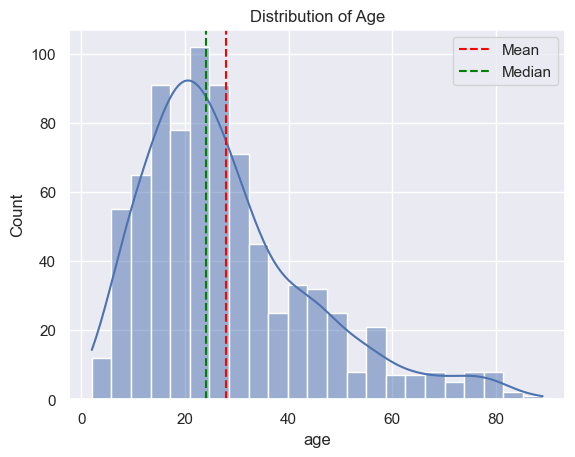

In [32]:
# Histogram for age
sns.histplot(df["age"],kde=True)
plt.title("Distribution of Age")


# calculate mean and median
age_mean = df["age"].mean()
age_median = df["age"].median()

print("Mean:",age_mean)
print("Median:",age_median)

# add vertical lines for mean and median
plt.axvline(age_mean, color="red",linestyle="--",label="Mean")
plt.axvline(age_median, color="green",linestyle="--",label="Median")

plt.legend()

plt.show()

Mean: 8.537303106501248
Median: 9.605299308


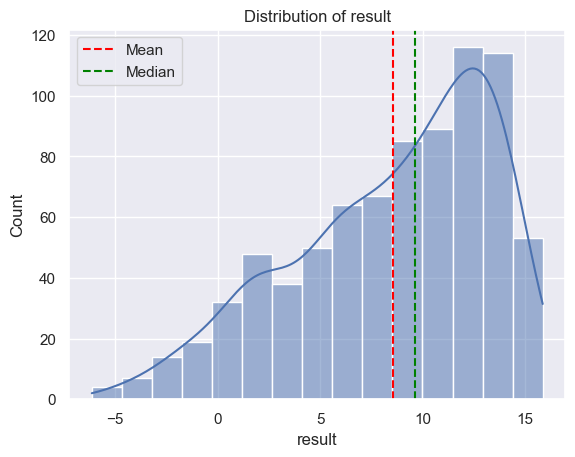

In [33]:
# Histogram for result
sns.histplot(df["result"],kde=True)
plt.title("Distribution of result")


# calculate mean and median
result_mean = df["result"].mean()
result_median = df["result"].median()

print("Mean:",result_mean)
print("Median:",result_median)

# add vertical lines for mean and median
plt.axvline(result_mean, color="red",linestyle="--",label="Mean")
plt.axvline(result_median, color="green",linestyle="--",label="Median")

plt.legend()

plt.show()

Box plots for identifying outliers in the numerical columns

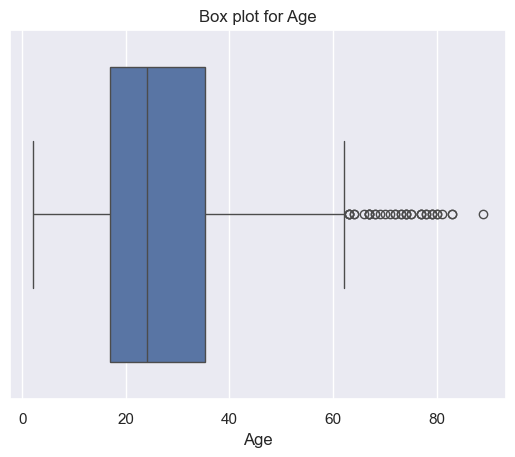

In [35]:
# Box plot
sns.boxplot(x=df["age"])
plt.title("Box plot for Age")
plt.xlabel("Age")
plt.show()

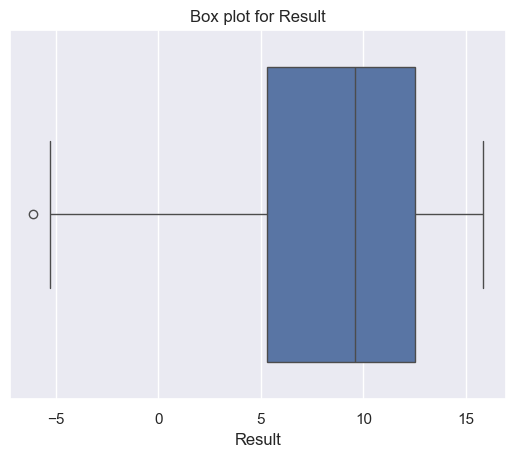

In [37]:
sns.boxplot(x=df["result"])
plt.title("Box plot for Result")
plt.xlabel("Result")
plt.show()

In [42]:
# count the outliers using IQR method
Q1 = df["age"].quantile(0.25)
Q3 = df["age"].quantile(0.75)
IQR = Q3 -Q1
lower_bound = Q1 - 1.5*IQR
upper_bound = Q3 + 1.5*IQR
age_outlier  = df[(df["age"]<lower_bound) | (df["age"]>upper_bound)]

In [43]:
len(age_outlier)

39

In [47]:
# count the outliers using IQR method
Q1 = df["result"].quantile(0.25)
Q3 = df["result"].quantile(0.75)
IQR = Q3 -Q1
lower_bound = Q1 - 1.5*IQR
upper_bound = Q3 + 1.5*IQR
result_outlier  = df[(df["result"]<lower_bound) | (df["result"]>upper_bound)]

In [48]:
len(result_outlier)

1

Univariate analysis of Categorical columns

In [52]:
df.columns

Index(['A1_Score', 'A2_Score', 'A3_Score', 'A4_Score', 'A5_Score', 'A6_Score',
       'A7_Score', 'A8_Score', 'A9_Score', 'A10_Score', 'age', 'gender',
       'ethnicity', 'jaundice', 'austim', 'contry_of_res', 'used_app_before',
       'result', 'relation', 'Class/ASD'],
      dtype='object')

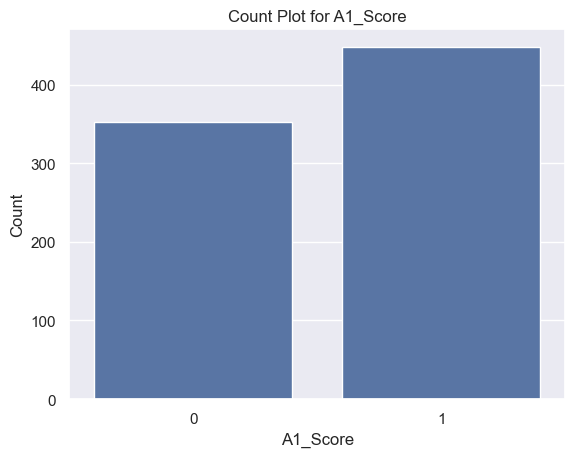

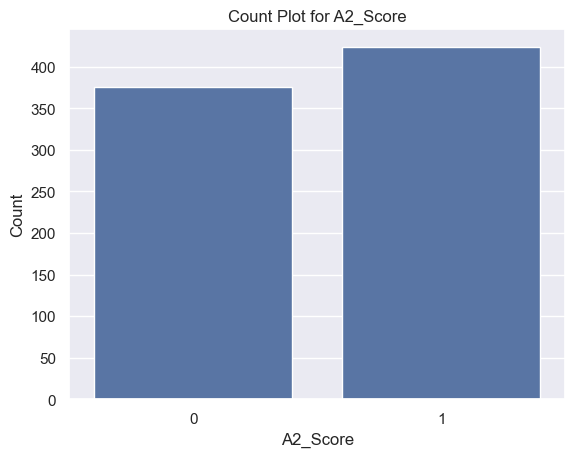

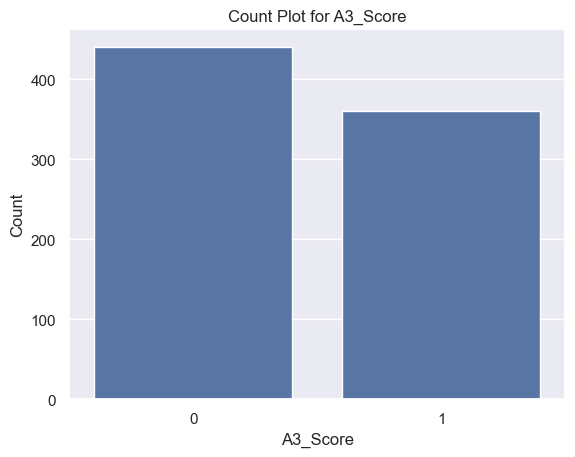

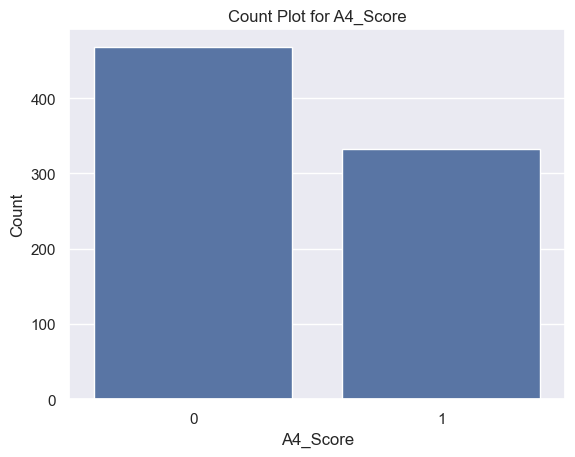

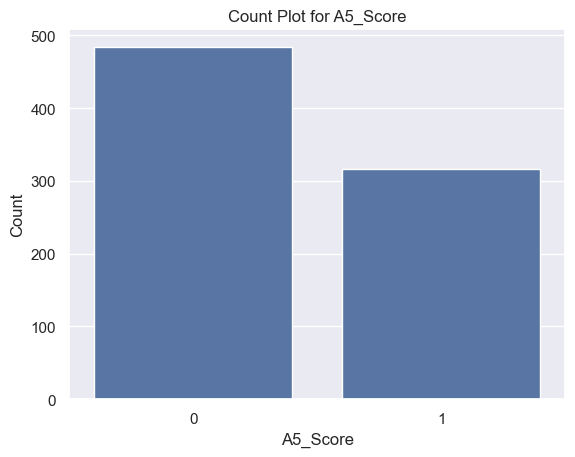

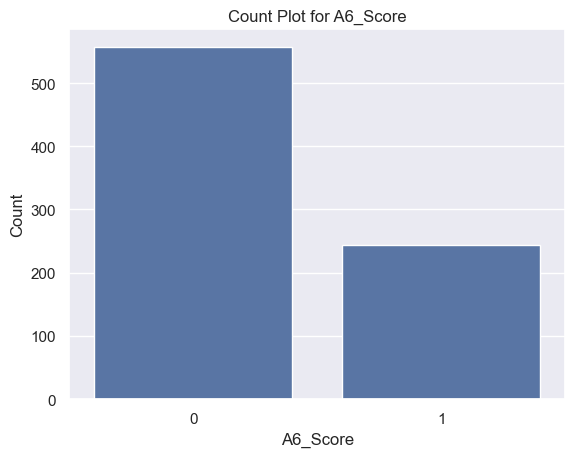

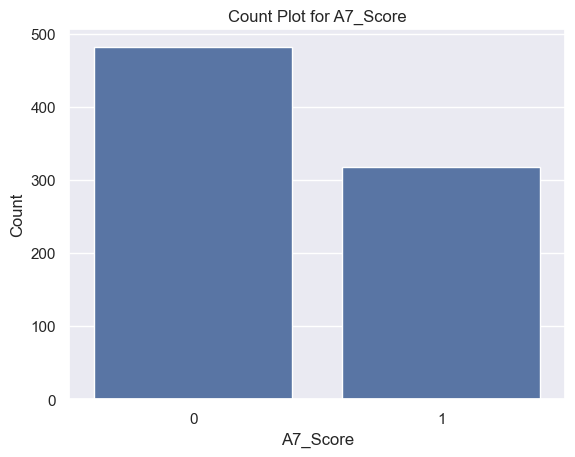

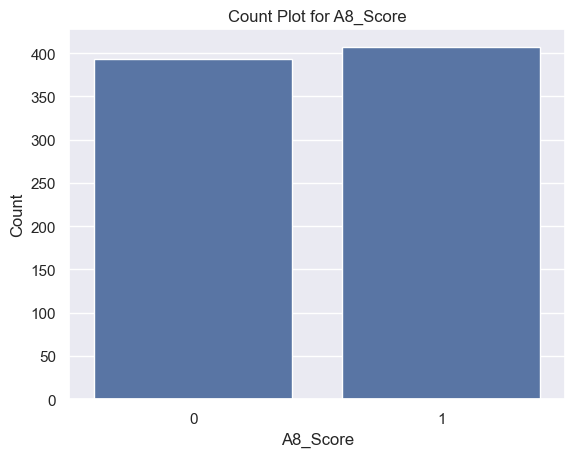

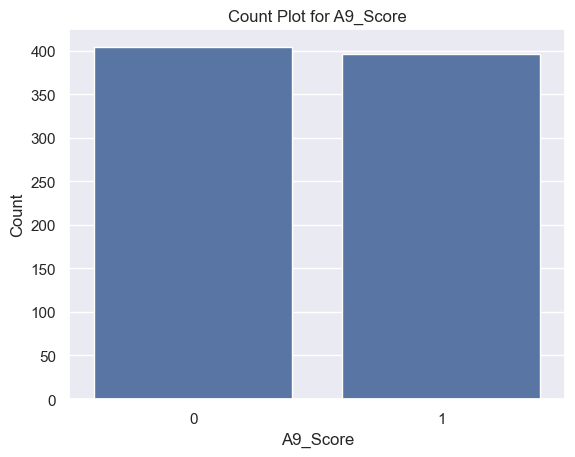

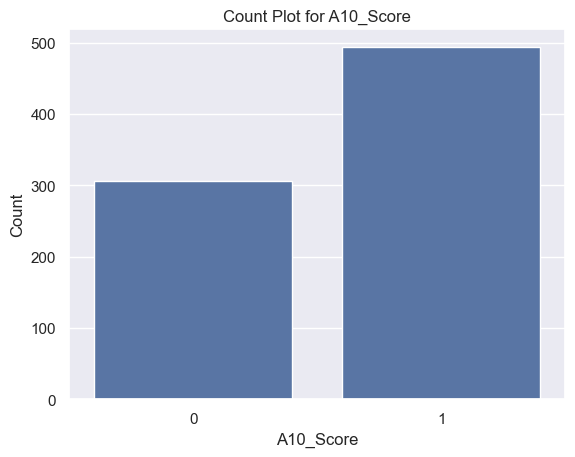

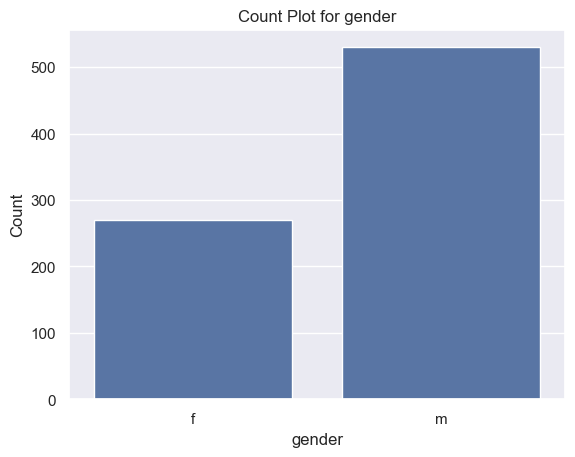

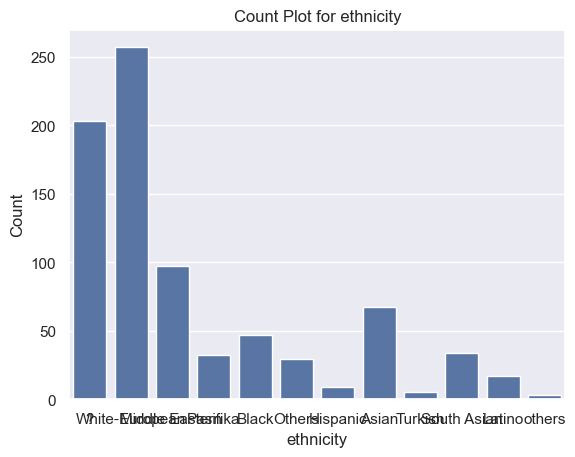

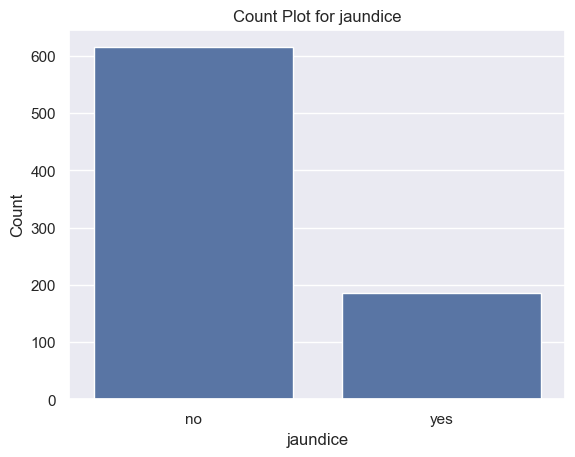

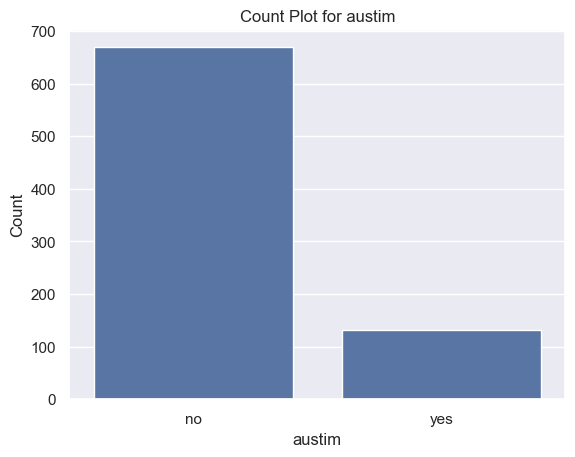

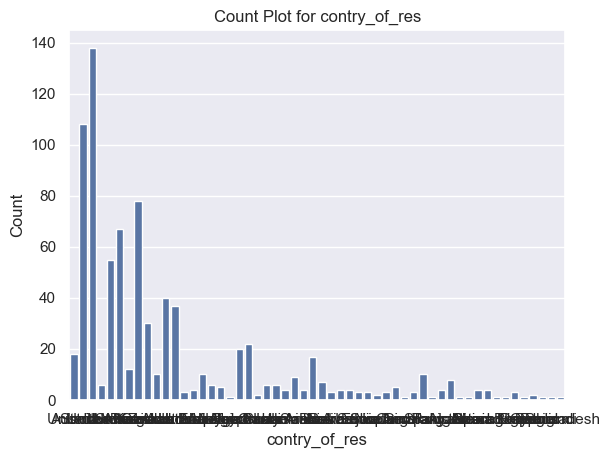

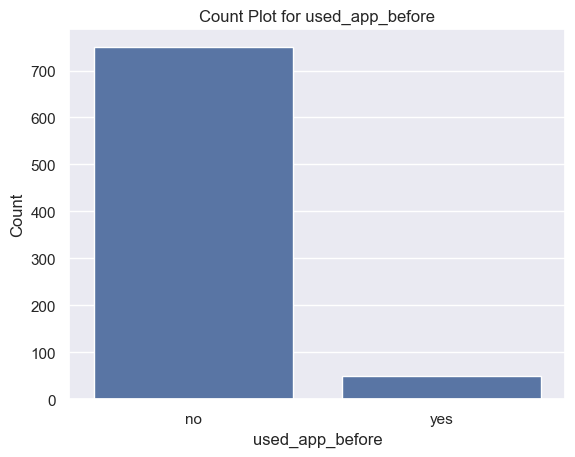

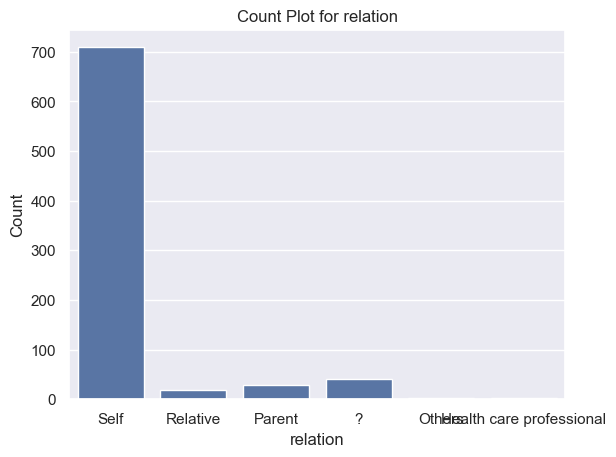

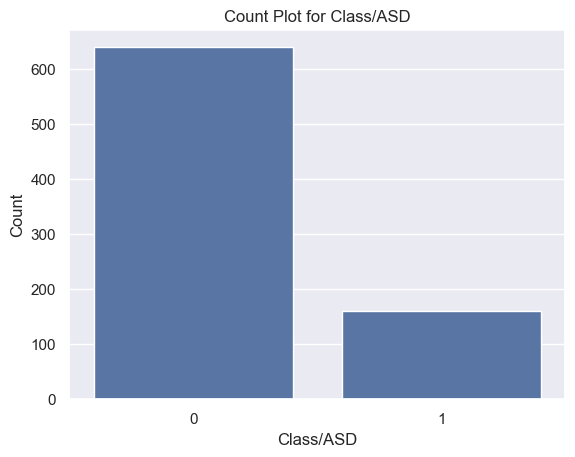

In [53]:
categorical_columns = ['A1_Score', 'A2_Score', 'A3_Score', 'A4_Score', 'A5_Score', 'A6_Score',
       'A7_Score', 'A8_Score', 'A9_Score', 'A10_Score', 'gender',
       'ethnicity', 'jaundice', 'austim', 'contry_of_res', 'used_app_before',
  'relation', 'Class/ASD']

for col in categorical_columns:
    sns.countplot(x=df[col])
    plt.title(f"Count Plot for {col}")
    plt.xlabel(col)
    plt.ylabel("Count")
    plt.show()
    
    

Handle missing values in ethnicity and relation column

In [54]:
df["ethnicity"] = df["ethnicity"].replace({"?":"Others","others":"Others"})

In [56]:
df["ethnicity"].unique()

array(['Others', 'White-European', 'Middle Eastern ', 'Pasifika', 'Black',
       'Hispanic', 'Asian', 'Turkish', 'South Asian', 'Latino'],
      dtype=object)

In [55]:
df["relation"].unique()

array(['Self', 'Relative', 'Parent', '?', 'Others',
       'Health care professional'], dtype=object)

In [57]:
df["relation"] = df["relation"].replace({
    "?" : "Others",
    "Relative":"Others",
    "Parent":"Others",
    "Health care professional":"Others",
    
})

In [58]:
df["relation"].unique()

array(['Self', 'Others'], dtype=object)

In [59]:
df.head()

,A1_Score,A2_Score,A3_Score,A4_Score,A5_Score,A6_Score,A7_Score,A8_Score,A9_Score,A10_Score,age,gender,ethnicity,jaundice,austim,contry_of_res,used_app_before,result,relation,Class/ASD
0,1,0,1,0,1,0,1,0,1,1,38,f,Others,no,no,Austria,no,6.351166,Self,0
1,0,0,0,0,0,0,0,0,0,0,47,m,Others,no,no,India,no,2.255185,Self,0
2,1,1,1,1,1,1,1,1,1,1,7,m,White-European,no,yes,United States,no,14.851484,Self,1
3,0,0,0,0,0,0,0,0,0,0,23,f,Others,no,no,United States,no,2.276617,Self,0
4,0,0,0,0,0,0,0,0,0,0,43,m,Others,no,no,South Africa,no,-4.777286,Self,0


Label Encoding

In [61]:
# identify columns with "object" data type
object_columns = df.select_dtypes(include=["object"]).columns
print(object_columns)

Index(['gender', 'ethnicity', 'jaundice', 'austim', 'contry_of_res',
       'used_app_before', 'relation'],
      dtype='object')


In [ ]:
# Initialize a dictionary to store the encoders

encoders = {}

# apply label encoding and store the encoders

for column in object_columns:
    label_encoder = LabelEncoder()
    df[column] = label_encoder.fit_transform(df[column])
    encoders[column] = label_encoder # saving the encoder for this column

# save the encoders as a pickle file
with open("encoders.pkl","wb") as f:
    pickle.dump(encoders,f)    

In [63]:
encoders

{'gender': LabelEncoder(),
 'ethnicity': LabelEncoder(),
 'jaundice': LabelEncoder(),
 'austim': LabelEncoder(),
 'contry_of_res': LabelEncoder(),
 'used_app_before': LabelEncoder(),
 'relation': LabelEncoder()}

In [65]:
df.head(10)

,A1_Score,A2_Score,A3_Score,A4_Score,A5_Score,A6_Score,A7_Score,A8_Score,A9_Score,A10_Score,age,gender,ethnicity,jaundice,austim,contry_of_res,used_app_before,result,relation,Class/ASD
0,1,0,1,0,1,0,1,0,1,1,38,0,5,0,0,6,0,6.351166,1,0
1,0,0,0,0,0,0,0,0,0,0,47,1,5,0,0,23,0,2.255185,1,0
2,1,1,1,1,1,1,1,1,1,1,7,1,9,0,1,52,0,14.851484,1,1
3,0,0,0,0,0,0,0,0,0,0,23,0,5,0,0,52,0,2.276617,1,0
4,0,0,0,0,0,0,0,0,0,0,43,1,5,0,0,44,0,-4.777286,1,0
5,1,0,0,0,0,1,0,0,1,1,31,1,4,0,0,29,0,9.562117,1,0
6,1,0,0,0,0,0,1,1,1,0,28,0,6,0,0,51,0,7.984569,1,0
7,1,1,1,1,1,1,1,0,1,1,26,1,1,0,1,52,0,13.237898,1,1
8,1,1,1,1,0,0,0,1,1,1,48,1,9,0,0,12,0,-1.755774,1,0
9,0,0,0,0,0,0,0,1,0,1,24,0,5,1,0,34,0,14.922570,1,0


Bivariate Analysis

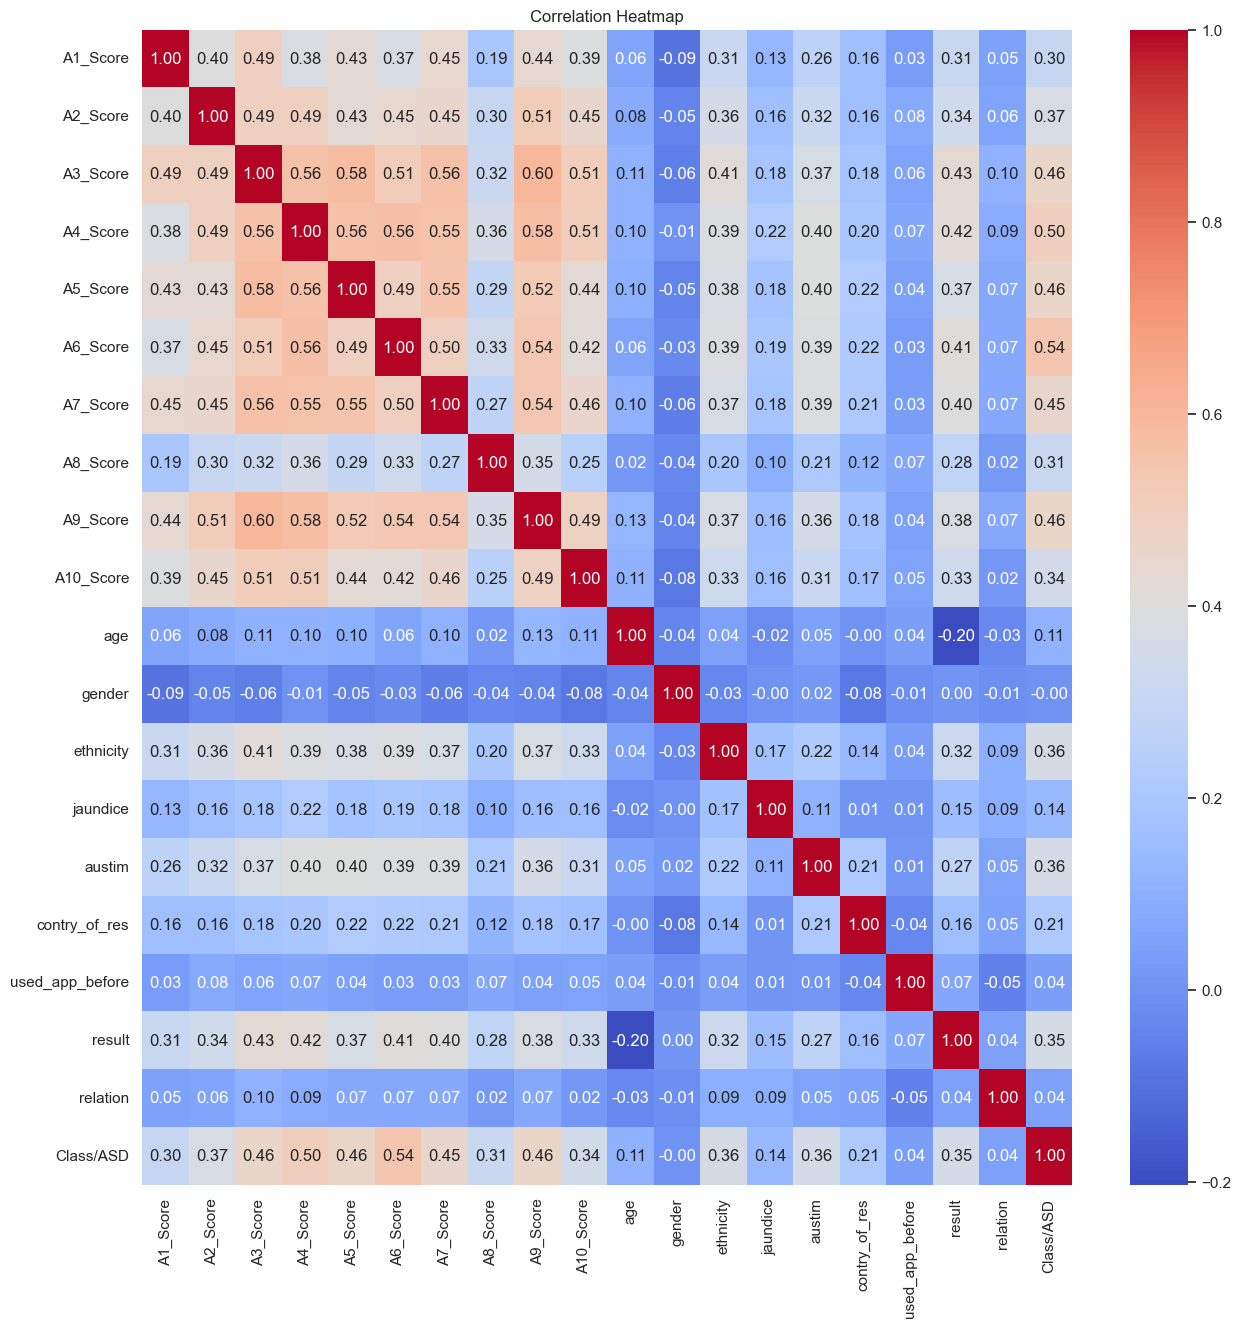

In [66]:
# correlation matrix
plt.figure(figsize=(15,15))
sns.heatmap(df.corr(),annot = True, cmap="coolwarm", fmt=".2f")
plt.title("Correlation Heatmap")
plt.show()

**Insights from EDA:**
- There are few outliers in nummerical columns (age, results)
- There is a class imbalance in the target column
- We dont have any highly correlated column
- performed label encoding and saved the encoders


4. Data preprocessing

In [67]:
# function to replace the outliers with median 
def replace_outliers_with_median(df,column):
    Q1 = df[column].quantile(0.25)
    Q3 = df[column].quantile(0.75)
    IQR = Q3 -Q1
    lower_bound = Q1 - 1.5*IQR
    upper_bound = Q3 + 1.5*IQR
    
    median = df[column].median()
    
# Replace outliers with median value  

    df[column] = df[column].apply(lambda x:median if x < lower_bound or x > upper_bound else x) 
    
    return df
 



In [68]:
# replace outliers in the age column
df = replace_outliers_with_median (df,"age")

# replace outliers in the result column
df = replace_outliers_with_median (df,"result")

In [69]:
df.head()

,A1_Score,A2_Score,A3_Score,A4_Score,A5_Score,A6_Score,A7_Score,A8_Score,A9_Score,A10_Score,age,gender,ethnicity,jaundice,austim,contry_of_res,used_app_before,result,relation,Class/ASD
0,1,0,1,0,1,0,1,0,1,1,38.0,0,5,0,0,6,0,6.351166,1,0
1,0,0,0,0,0,0,0,0,0,0,47.0,1,5,0,0,23,0,2.255185,1,0
2,1,1,1,1,1,1,1,1,1,1,7.0,1,9,0,1,52,0,14.851484,1,1
3,0,0,0,0,0,0,0,0,0,0,23.0,0,5,0,0,52,0,2.276617,1,0
4,0,0,0,0,0,0,0,0,0,0,43.0,1,5,0,0,44,0,-4.777286,1,0


In [70]:
df.shape

(800, 20)

Train Test Split

In [71]:
df.columns

Index(['A1_Score', 'A2_Score', 'A3_Score', 'A4_Score', 'A5_Score', 'A6_Score',
       'A7_Score', 'A8_Score', 'A9_Score', 'A10_Score', 'age', 'gender',
       'ethnicity', 'jaundice', 'austim', 'contry_of_res', 'used_app_before',
       'result', 'relation', 'Class/ASD'],
      dtype='object')

In [72]:
X = df.drop(columns=["Class/ASD"])
y = df["Class/ASD"]

In [73]:
X_train, X_test, y_train, y_test = train_test_split(X,y, test_size=0.2, random_state= 42)

In [74]:
print(y_train.shape)
print(y_test.shape)

(640,)
(160,)


In [75]:
y_train.value_counts()

Class/ASD
0    515
1    125
Name: count, dtype: int64

In [76]:
y_test.value_counts()

Class/ASD
0    124
1     36
Name: count, dtype: int64

SMOTE (Synthetic Minority Oversampling technique)

In [77]:
smote = SMOTE(random_state=42)

In [78]:
X_train_smote,y_train_smote = smote.fit_resample(X_train,y_train)

In [81]:
print(y_train_smote.shape)

(1030,)


In [80]:
print(y_train_smote.value_counts())

Class/ASD
1    515
0    515
Name: count, dtype: int64


5. Model Training

In [82]:
# dictionary of classifiers

models = {
    "Decision Tree" : DecisionTreeClassifier(random_state=42),
    "Random Forest" : RandomForestClassifier(random_state=42),
    "XGBoost" : XGBClassifier(random_state=42)
} 

In [86]:
# dictionary to store the cross validation results

cv_scores = {}

# perform 5-fold cross validation for each model
for model_name, model in models.items():
    print(f"Training {model_name} with default parameters...")
    scores = cross_val_score(model, X_train_smote,y_train_smote, cv = 5,scoring="accuracy")
    cv_scores[model_name] = scores
    print(f"{model_name} Cross-Validation Accuracy: {np.mean(scores):.2f}")
    print("-"*50)

Training Decision Tree with default parameters...
Decision Tree Cross-Validation Accuracy: 0.86
--------------------------------------------------
Training Random Forest with default parameters...
Random Forest Cross-Validation Accuracy: 0.92
--------------------------------------------------
Training XGBoost with default parameters...
XGBoost Cross-Validation Accuracy: 0.90
--------------------------------------------------


In [87]:
cv_scores

{'Decision Tree': array([0.7961165 , 0.87864078, 0.87378641, 0.8592233 , 0.87378641]),
 'Random Forest': array([0.90776699, 0.92718447, 0.9223301 , 0.91747573, 0.9223301 ]),
 'XGBoost': array([0.8592233 , 0.92718447, 0.90291262, 0.91262136, 0.90776699])}

6. Model Selection and Hyperparameter Tuning

In [89]:
decision_tree = DecisionTreeClassifier(random_state=42),
random_forest = RandomForestClassifier(random_state=42),
xgboost_classifier = XGBClassifier(random_state=42)

In [90]:
# Hyperparameter grids for RandomizedSearchCV

param_grid_dt = {
    "criterion" :["gini","entropy"],
    "max_depth" :[None, 5, 10, 20, 30, 50, 70],
    "min_samples_split" :[2,5,10],
    "min_samples_leaf" :[1,2,4]
}

param_grid_rf = {
    "n_extimators":[50, 100, 200, 500],
    "max_depth" :[None, 5, 10, 20, 30],
    "min_samples_split" :[2,5,10],
    "min_samples_leaf" :[1,2,4],
    "bootstrap" :[True, False] 
}

param_grid_xgb = {
    "n_extimators":[50, 100, 200, 500],
    "max_depth" :[3, 5, 7, 10],
    "learning_rate" :[0.01,0.1,0.2,0.3],
    "subsample" :[0.5,0.7,1.0],
    "colsample_bytree" :[0.5,0.7,1.0]
}



In [93]:
# hyperparameter tuning for 3 models
# perform RandomizedSearchCV for each model

random_search_dt = RandomizedSearchCV(estimator= decision_tree, param_distributions= param_grid_dt,n_iter=10, cv=5, scoring="accuracy", random_state=42)
random_search_rf = RandomizedSearchCV(estimator= random_forest, param_distributions= param_grid_dt,n_iter=10, cv=5, scoring="accuracy", random_state=42)
random_search_xgb = RandomizedSearchCV(estimator= xgboost_classifier, param_distributions= param_grid_dt,n_iter=10, cv=5, scoring="accuracy", random_state=42)


In [ ]:
# fit the models
random_search_dt.fit(X_train_smote,y_train_smote)
random_search_rf.fit(X_train_smote,y_train_smote)
random_search_xgb.fit(X_train_smote,y_train_smote)
